In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [16]:
!pip install  numexpr==2.7.3

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [20]:
# Function to load all CSV files from a directory and combine them into a single DataFrame
def load_csv_from_directory(directory, column_names):
    # List all files in the directory that match the pattern (e.g., '000000_0', '000001_0', etc.)
    all_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.startswith('000') and f.endswith('_0')]
    print(all_files)
    # Read each file into a DataFrame and store them in a list
    df_list = [pd.read_csv(f, header=None, names=column_names) for f in all_files]
    
    # Concatenate all DataFrames into one
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df


In [18]:
# Define paths to the directories containing the CSV files generated by Hive queries
attack_category_dir = 'attack_category_frequency'
service_type_dir = 'service_type_distribution'
daily_attack_dir = 'daily_attack_frequency'
duration_avg_sbytes_dir = 'duration_avg_source_bytes'
protocol_attack_category_dir = 'protocol_attack_category'


In [28]:
# Load CSV files from directories into pandas DataFrames
df_attack_category = load_csv_from_directory(attack_category_dir, ['attack_cat', 'attack_count']).sort_values(by ="attack_count")
df_service_type = load_csv_from_directory(service_type_dir, ['service', 'service_count'])
df_daily_attack = load_csv_from_directory(daily_attack_dir, ['day', 'attack_count'])
df_duration_avg_sbytes = load_csv_from_directory(duration_avg_sbytes_dir, ['duration_range', 'avg_sbytes'])
df_protocol_attack_category = load_csv_from_directory(protocol_attack_category_dir, ['proto', 'attack_cat', 'protocol_count'])


['attack_category_frequency/000001_0', 'attack_category_frequency/000000_0', 'attack_category_frequency/000002_0']
['service_type_distribution/000001_0', 'service_type_distribution/000000_0', 'service_type_distribution/000002_0']
['daily_attack_frequency/000001_0', 'daily_attack_frequency/000000_0', 'daily_attack_frequency/000002_0']
['duration_avg_source_bytes/000001_0', 'duration_avg_source_bytes/000000_0', 'duration_avg_source_bytes/000002_0']
['protocol_attack_category/000001_0', 'protocol_attack_category/000000_0', 'protocol_attack_category/000002_0']


In [33]:
# Function to create bar charts
def create_bar_chart(x, y, xlabel, ylabel, title, rotation=0):
    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

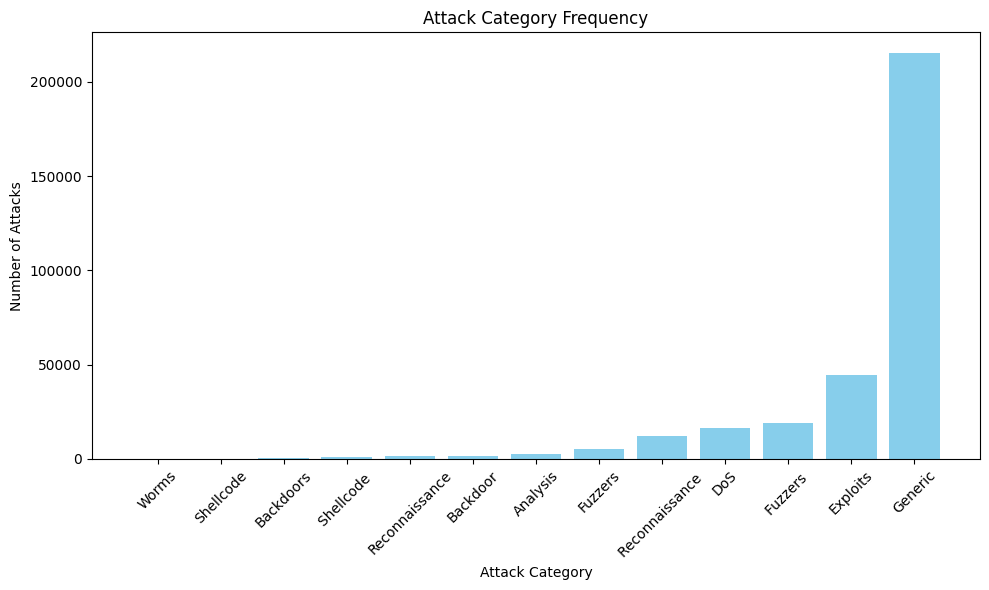

In [43]:
# 1. Attack Category Frequency
df_attack_category = df_attack_category.dropna(subset=['attack_cat'])
df_attack_category['attack_count'] = df_attack_category['attack_count'].fillna(0).astype(int)
create_bar_chart(
    x=df_attack_category['attack_cat'],
    y=df_attack_category['attack_count'],
    xlabel='Attack Category', 
    ylabel='Number of Attacks', 
    title='Attack Category Frequency', 
    rotation=45
)

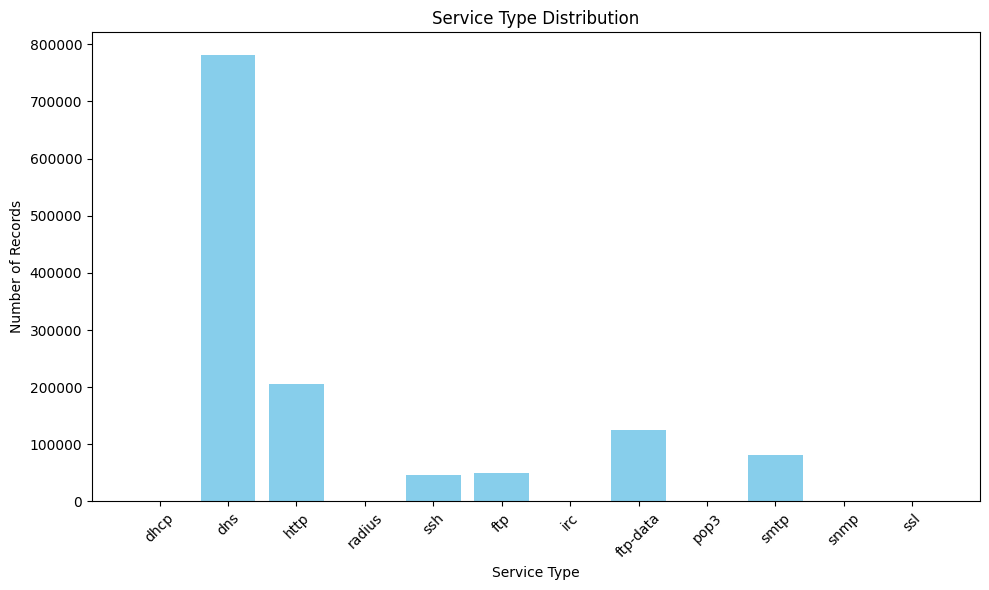

In [51]:
# 2. Service Type Distribution
df_service_type = df_service_type[df_service_type['service']!='-']
create_bar_chart(
    x=df_service_type['service'], 
    y=df_service_type['service_count'], 
    xlabel='Service Type', 
    ylabel='Number of Records', 
    title='Service Type Distribution', 
    rotation=45
)

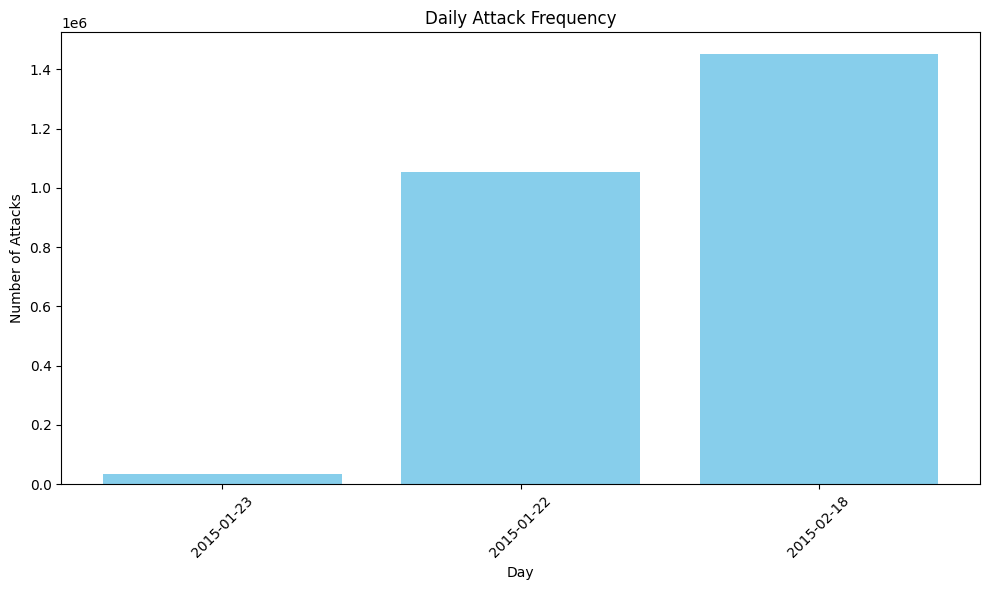

In [58]:
create_bar_chart(
    x=df_daily_attack['day'], 
    y=df_daily_attack['attack_count'], 
    xlabel='Day', 
    ylabel='Number of Attacks', 
    title='Daily Attack Frequency', 
    rotation=45
)

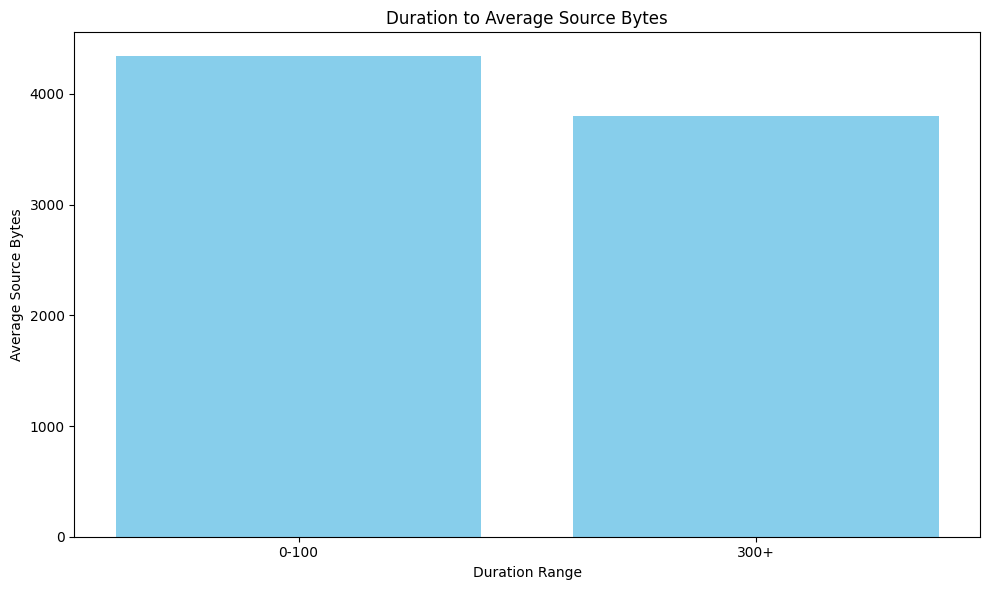

In [59]:
create_bar_chart(
    x=df_duration_avg_sbytes['duration_range'], 
    y=df_duration_avg_sbytes['avg_sbytes'], 
    xlabel='Duration Range', 
    ylabel='Average Source Bytes', 
    title='Duration to Average Source Bytes'
)

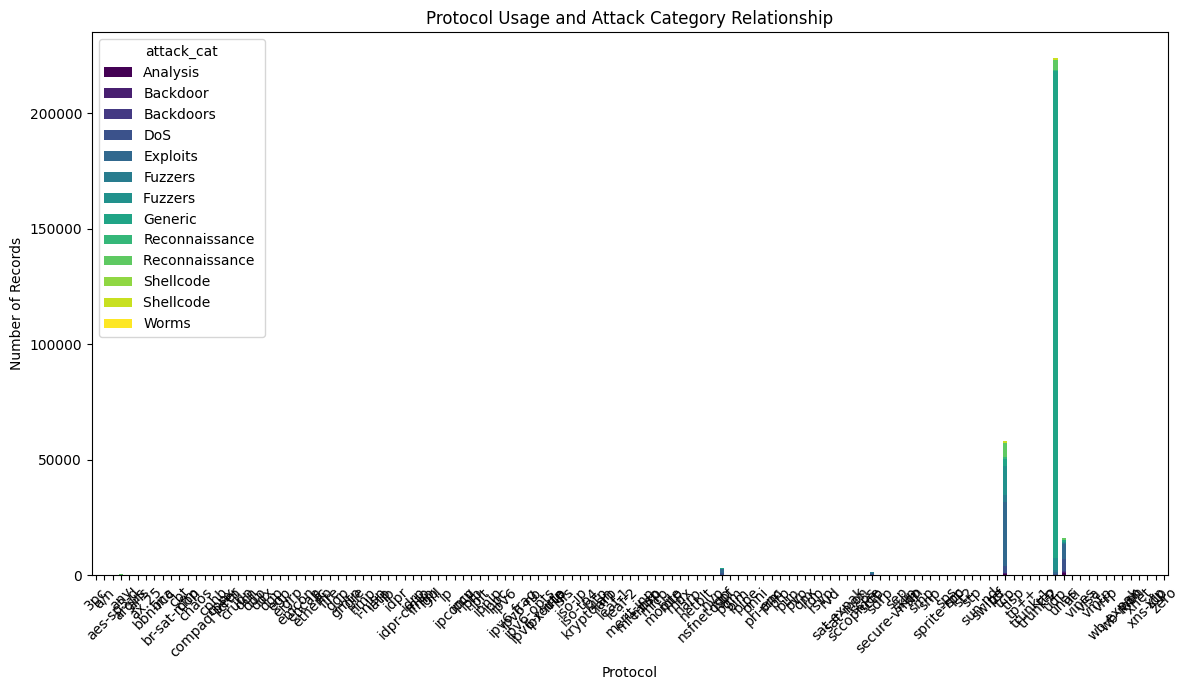

In [60]:
df_protocol_pivot = df_protocol_attack_category.pivot_table(index='proto', columns='attack_cat', values='protocol_count', aggfunc='sum').fillna(0)

# Plot a stacked bar chart to show the relationship between protocol and attack categories
df_protocol_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

plt.title('Protocol Usage and Attack Category Relationship')
plt.xlabel('Protocol')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()